# ML Course 2 - Data Preparation - TP

## Subject

We provide here a data set on the customers of a bank:
- CustomerId = customer id in the information system of the bank
- Surname = surname of the customer
- CreditScore = score attributed by the bank as estimation of capacity to reimburse a loan
- Geography = country of the customer
- Gender = sex of the customer
- Age = age of the customer
- Tenure = loan duration (year)
- Balance = amount of money on main account (\$)
- NumOfProducts = number of products the customer has in the banl
- HasCrCard = tells if the customer owns a credit card
- IsActiveMember = tells if the customer has an active account
- EstimatedSalary = estimated salary of the customer (\$)
- Exited = tells if the customer has left the bank

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns

In [119]:
dataset_raw= pd.read_csv('bank_churn.csv', index_col=0)
dataset_raw

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,yes
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,no
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,yes
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,no
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10005,6341,15659064,Salas,790.0,Spain,Male,37,8,0.00,2,1,1,149418.41,no
10006,577,15761986,Obialo,439.0,Spain,Female,32,3,138901.61,1,1,0,75685.97,no
10007,5203,15713354,Morrice,597.0,Germany,Female,22,6,101528.61,1,1,0,70529.00,yes
10008,6364,15593454,Lambert,678.0,Spain,Female,40,4,113794.22,1,1,0,16618.76,no


The objective of the bank is to predict the churn, i.e. if a customer is likely to leave the bank, based on his/her profile (estimated salary, geography, age, etc.).
Here, we will prepare the data set so that it can be directly used for ML processing. The work is limited to data exploration and preparation, we will not make ML prediction yet. 

# Data Exploration 
Perform data exploration to answer the following two questions.

For each graph/table you make, you should:
- Plot the graph, or display the table
- Povide a title, axis labels and legend if applicable

### Question 1: Are there some features that are correlated with each other?

Text(0.5, 1.0, 'Correlation Matrix')

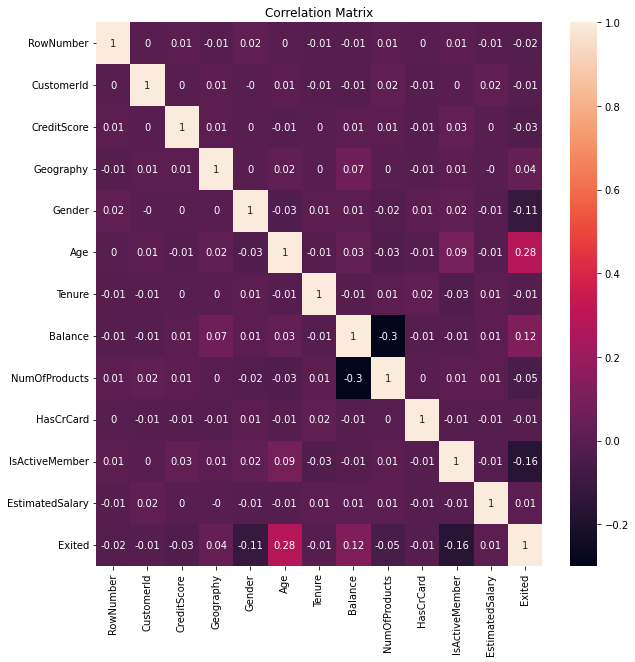

In [120]:
from sklearn.preprocessing import *
df=dataset_raw.copy()
# categorical= df.select_dtypes(include='object').columns

#dropping surname column
df.drop('Surname', axis=1, inplace=True)

#transforming ordinal categorical datas
ordinal_encoder=OrdinalEncoder()
df[['Gender','Exited']]=ordinal_encoder.fit_transform(df[['Gender','Exited']]).astype(int)

#transforming geography column 
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df.corr()
plt.figure(figsize=(10,10))
plot=sns.heatmap(df.corr().round(2),annot=True)
plt.title('Correlation Matrix')



📝 List the features that are correlated with each other.

Based on the graph, 

the features that are positively correlated with each other are:

    Age and Exited (correlation coefficient of 0.28)

The features that are negatively correlated with each other are:
    
    Balance and NumOfProducts (correlation coefficient of -0.30)
    Balance and IsActiveMember (correlation coefficient of -0.11)
    NumOfProducts and Exited (correlation coefficient of -0.04)


### Question 2: What features seem to be the most correlated with the target variable (label)?  


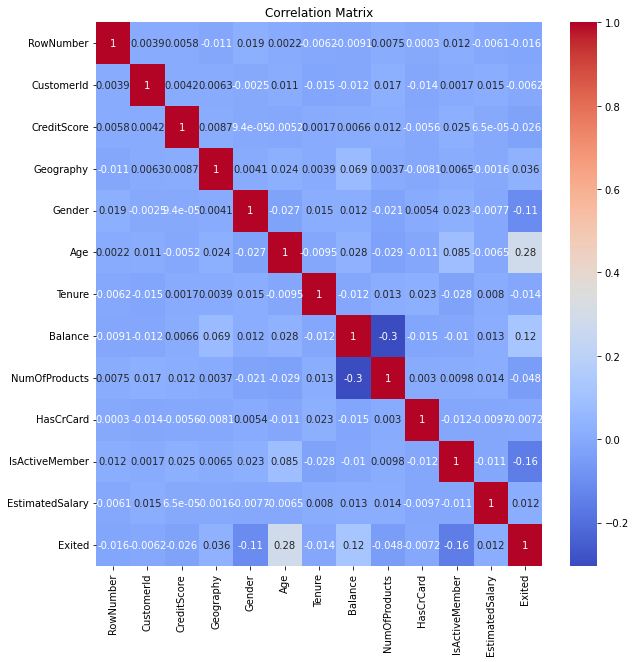

In [121]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

📝 List the features that are the most correlated with the target variable.

In [ ]:
Based on the graph, 
the features that seem to be the most correlated with Exited are:

Age: 0.28
Balance: 0.12
Gender: -0.11
isActiveMember: -0.16

📝 Write a few lines to summarize your data exploration and explain what features you think will be the most useful to predict churn.

In the data exploration,I first examined the data and We found that the dataset contains 10,010 records and 14 features, including numerical, categorical, and binary features.

I then converted the categorical data into numerical using Lable Encoding for Geography and Ordinal Encoding for Gender and Exited.

Then I explored the correlation matrix to identify the relationships between the features and the target variable "Exited".Found that Age and Balance were the most positively correlated features with Exited, while Gender and isActivemember were the most negatively correlated features.

Finally,created visualizations to better understand the distribution of the data and relationships between the features. From the analysis, we believe that Age, Balance, NumOfProducts, and IsActiveMember will be the most useful features for predicting churn.

# Data Cleaning 
## Data diagnosis
Before building your data cleaning pipeline, make a diagnosis on your data.
### Check if the dataset contains aberrant data points or missing data.

In [122]:
# Getting summary statistics for numerical columns
print(dataset_raw.describe().round(2))

# Check for missing data
print(dataset_raw.isnull().sum())

       RowNumber   CustomerId  CreditScore       Age    Tenure    Balance  \
count   10010.00     10010.00      9715.00  10010.00  10010.00   10010.00   
mean     4999.59  15690947.14       650.19     38.91      5.01   76487.48   
std      2886.43     71918.29        96.73     10.51      2.89   62388.76   
min         1.00  15565701.00       350.00     -1.00      0.00       0.00   
25%      2500.25  15628564.25       583.00     32.00      3.00       0.00   
50%      4999.50  15690738.00       651.00     37.00      5.00   97198.54   
75%      7497.75  15753225.50       717.00     44.00      7.00  127638.24   
max     10000.00  15815690.00       850.00     92.00     10.00  250898.09   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
count       10010.00   10010.00        10010.00         10010.00  
mean            1.53       0.71            0.52        100090.99  
std             0.58       0.46            0.50         57505.59  
min             1.00       0.00       

### 📝 List the variables that you think are irrelevant for the problem at hand and **explain why**.

RowNumber: This variable resembles an index but offers no meaningful data for prediction.

CustomerId and Surname: These variables may be helpful for locating specific clients, but they are not likely to be significant for prediction.

EstimatedSalary: this variable may be correlated with customer churn in some cases, it is not necessarily relevant for predicting.


## Pipeline
You will build a rudimentary pipeline to prepare your data. Fill the function called clean_data, that will perform the following cleaning tasks :
Make sure that all your operations create a NEW dataframe and DON'T CHANGE THE ORIGINAL _dataset_raw_.
- Drop duplicates 
- Fix missing data
- Remove aberrant data points
- Drop features that you consider irrelevant for the problem at hand.

In [123]:
def clean_data(dataset_raw: pd.DataFrame):
    dataset_clean=dataset_raw.copy()
     # Droping duplicates
    dataset_clean = dataset_clean.drop_duplicates()
    
    # Filling missing data
    dataset_clean['CreditScore'] = dataset_clean['CreditScore'].fillna(dataset_clean['CreditScore'].mean())
    
    # Removing aberrant data points
    dataset_clean = dataset_clean[dataset_clean['CreditScore'] > 300] # remove any credit scores below 300
    
    # Dropping features that are irrelevant for the problem at hand
    dataset_clean = dataset_clean.drop(['RowNumber', 'CustomerId', 'Surname', 'EstimatedSalary'], axis=1)
    
    return dataset_clean

Execute your pipeline to clean your data and store it in a new variable: dataset_clean

In [124]:
dataset_clean: pd.DataFrame = clean_data(dataset_raw)
    
# Automatic test
assert dataset_clean is not dataset_raw, "Your clean_data function should return a new DataFrame without changing the input one."
assert dataset_clean.isna().sum().sum() == 0, "Your clean dataset shouldn't have any missing data."
assert set(dataset_clean) != set(dataset_raw), "You should drop the variables that are not useful."

# Data Splitting 
- Separate your features (X) from your target variable (y).
- Split the dataset in a Train vs Test set (25% should be used as test set).

At the end of this step, you should end up with the following variables:  
X_train_clean  
y_train_clean  
X_test_clean  
y_test_clean  

In [135]:
from sklearn.model_selection import train_test_split
X=dataset_clean.drop('Exited',axis=1)
y=dataset_clean['Exited']
X_train_clean,X_test_clean,y_train_clean,y_test_clean= train_test_split(X,y,test_size = 0.25 , random_state=42)
X_train_clean

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
4901,673.000000,France,Male,59,0,178058.06,2,0,1
4375,850.000000,Germany,Male,41,8,60880.68,1,1,0
6698,725.000000,France,Female,31,6,0.00,1,0,0
9805,644.000000,France,Male,33,7,174571.36,1,0,1
1101,703.000000,Spain,Male,29,9,0.00,2,1,0
...,...,...,...,...,...,...,...,...,...
5734,650.260381,France,Male,54,8,69712.74,1,1,1
5191,650.260381,France,Female,58,1,0.00,1,1,1
5390,650.260381,France,Female,38,1,0.00,3,0,0
860,650.260381,France,Male,43,8,190227.46,1,1,0


# Data Transformation 
Prepare the dataset for modelling:
   - Encode variables to make them all numerical
   - Perform feature scaling on non-encoded numerical features  

You should end up with the follwing variables:  
X_train  
y_train  
X_test  
y_test  

In [138]:
from sklearn.preprocessing import StandardScaler

#transforming ordinal categorical datas
ordinal_encoder=OrdinalEncoder()
X_train_clean[['Gender']]=ordinal_encoder.fit_transform(X_train_clean[['Gender']]).astype(int)
X_test_clean[['Gender']]=ordinal_encoder.fit_transform(X_test_clean[['Gender']]).astype(int)

#transforming geography column 
label_encoder = LabelEncoder()
X_train_clean['Geography'] = label_encoder.fit_transform(X_train_clean['Geography'])
X_test_clean['Geography'] = label_encoder.fit_transform(X_test_clean['Geography'])

#scaling numerical columns 
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
scaler = StandardScaler()
X_train_clean[num_cols] = scaler.fit_transform(X_train_clean[num_cols])
X_test_clean[num_cols] = scaler.fit_transform(X_test_clean[num_cols])

X_train=X_train_clean
X_test=X_test_clean
y_train=X_train_clean
y_test=y_test_clean
